In [2]:
pip install opendatasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [4]:
od.download("stackoverflow-developer-survey-2020")

94609408it [00:03, 30883558.41it/s]                               


16384it [00:00, 90643.63it/s]           


8192it [00:00, 62343.71it/s]            


In [5]:
survey_df = pd.read_csv("stackoverflow-developer-survey-2020/survey_results_public.csv")
schema_df = pd.read_csv("stackoverflow-developer-survey-2020/survey_results_schema.csv")

In [6]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## **Developer Roles**

In [7]:
survey_df["DevType"].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

**Function for split multi responses columns**

In [8]:
def split_multi_responses(multi_responses):
  result_df = pd.DataFrame(index=multi_responses.index)
  options = []

  for indx, value in multi_responses.items():
    if pd.notnull(value):
      for option in value.split(';'):
        if option not in options:
          options.append(option)
          result_df[option] = False
        result_df.at[indx, option] = True
  return result_df[options]

In [9]:
dev_role_df = split_multi_responses(survey_df["DevType"])
dev_roles = dev_role_df.sum().sort_values(ascending=False)

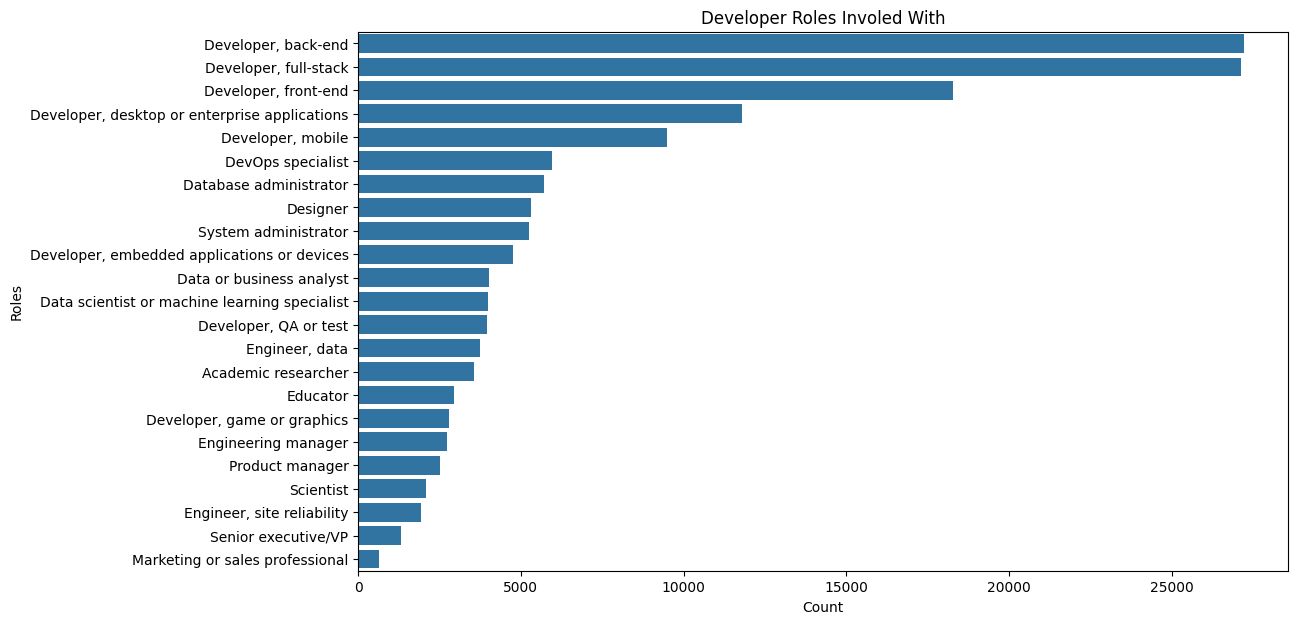

In [10]:
plt.figure(figsize=(12, 7))
sns.barplot(x=dev_roles.values, y=dev_roles.index)
plt.title("Developer Roles Involed With")
plt.xlabel("Count")
plt.ylabel("Roles")
plt.show()

In [11]:
dev_roles_per = dev_roles*100 / dev_roles.sum()

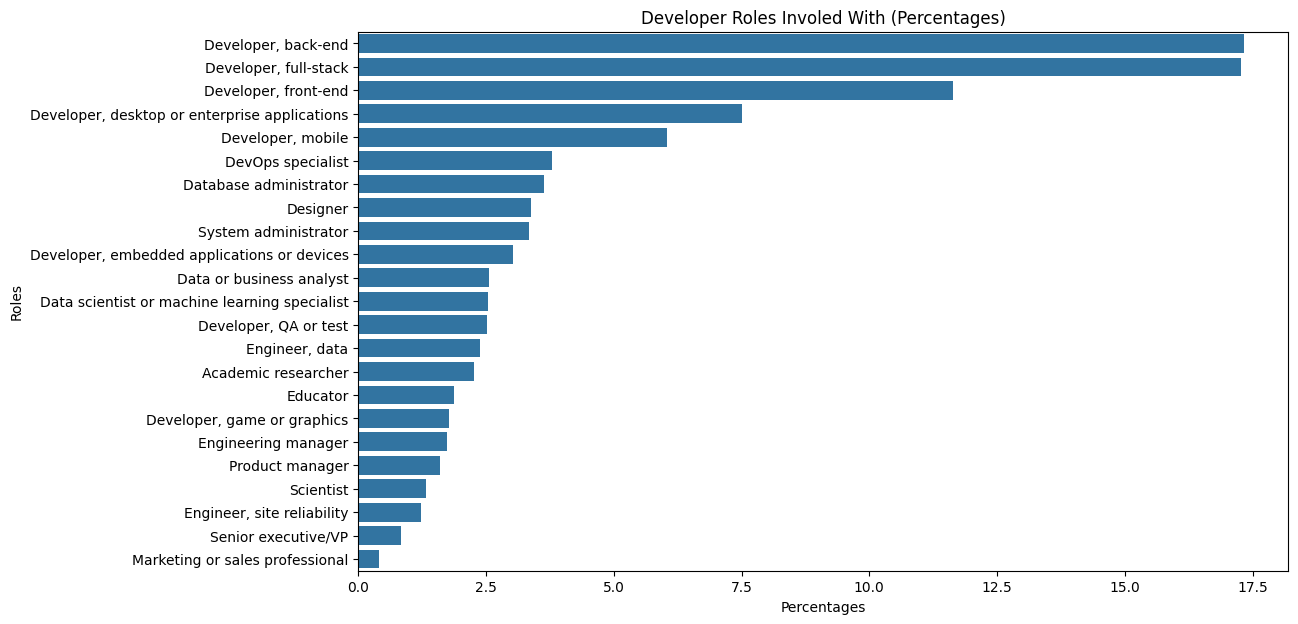

In [12]:
plt.figure(figsize=(12, 7))
sns.barplot(x=dev_roles_per.values, y=dev_roles_per.index)
plt.title("Developer Roles Involed With (Percentages)")
plt.xlabel("Percentages")
plt.ylabel("Roles")
plt.show()

**Coding as a Hobby**

In [13]:
hobbyist = survey_df["Hobbyist"].value_counts(dropna=False)
hobbyist_per = hobbyist*100/hobbyist.sum()

<function matplotlib.pyplot.show(close=None, block=None)>

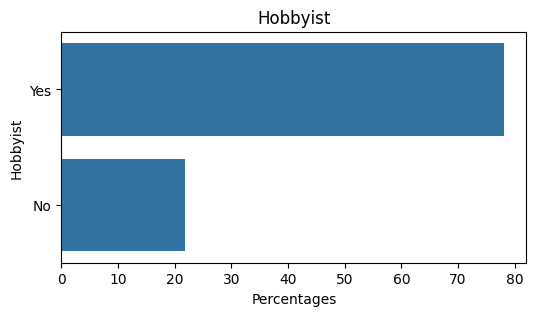

In [14]:
plt.figure(figsize=(6, 3))
sns.barplot(y=hobbyist_per.index, x=hobbyist_per.values)
plt.title("Hobbyist")
plt.ylabel("Hobbyist")
plt.xlabel("Percentages")
plt.show

## **Experience**

**Years Since Learning to Code**

In [15]:
survey_df["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [16]:
years_code = survey_df["YearsCode"]
years_code = years_code.replace("More than 50 years", 51)
years_code = years_code.replace("Less than 1 year", 0.5)
years_code = years_code.astype(float)

<ipython-input-17-0ae2dcf81418>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years_code, bins=np.arange(0, 52, 1))


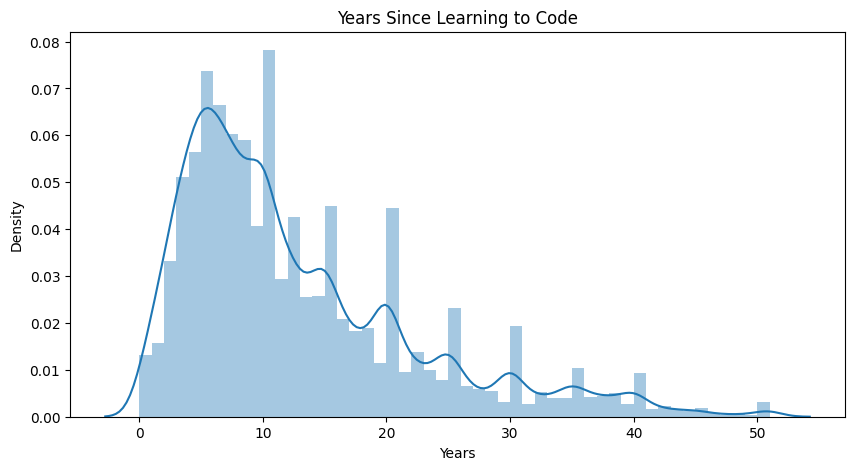

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(years_code, bins=np.arange(0, 52, 1))
plt.title("Years Since Learning to Code")
plt.xlabel("Years")
plt.show()

**Distribution of Years Coding Professionally**

In [18]:
survey_df["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [19]:
years_code_pro = survey_df["YearsCodePro"]
years_code_pro = years_code_pro.replace("More than 50 years", 51)
years_code_pro = years_code_pro.replace("Less than 1 year", 0.5)
years_code_pro = years_code_pro.astype(float)

<ipython-input-20-4217670477c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years_code_pro, bins=np.arange(0, 52, 1))


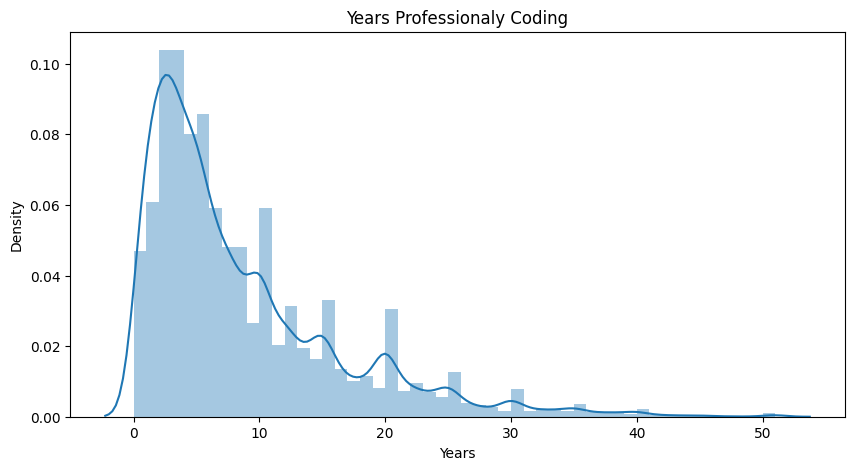

In [20]:
plt.figure(figsize=(10, 5))
sns.distplot(years_code_pro, bins=np.arange(0, 52, 1))
plt.title("Years Professionaly Coding")
plt.xlabel("Years")
plt.show()

**Years of Professional Coding Experience by Developer Type**

In [21]:
dev_role_df["YearsCodePro"] = years_code_pro
dev_role_df.head()

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,YearsCodePro
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,27.0
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8.0


In [22]:
dev_role_df[dev_role_df["Developer, full-stack"]==1]["YearsCodePro"].mean()

8.671170284003624

In [23]:
dev_roles = dev_role_df.columns[:-1]
dev_roles_count_years = pd.DataFrame(columns=("Role", "Count"))
i = 0

for role in dev_roles:
  mean = dev_role_df[dev_role_df[role]==1]["YearsCodePro"].mean()
  dev_roles_count_years.loc[i] = [role, mean]
  i = i+1


Text(0, 0.5, 'Role')

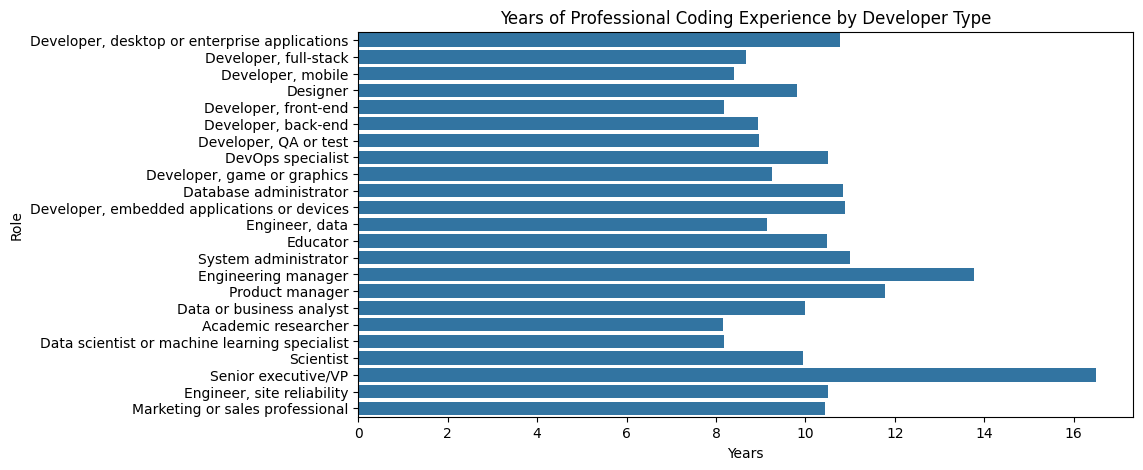

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Role", data=dev_roles_count_years)
plt.title("Years of Professional Coding Experience by Developer Type")
plt.xlabel("Years")
plt.ylabel("Role")

**Writing That First Line of Code**

In [25]:
survey_df["Age1stCode"].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [26]:
age1st_code = survey_df["Age1stCode"]
age1st_code = age1st_code.replace("Older than 85", 90)
age1st_code = age1st_code.replace("Younger than 5 years", 2.5)
age1st_code = age1st_code.astype(float)

<ipython-input-27-795c41d2625b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1st_code, bins=np.arange(0, 91, 1))


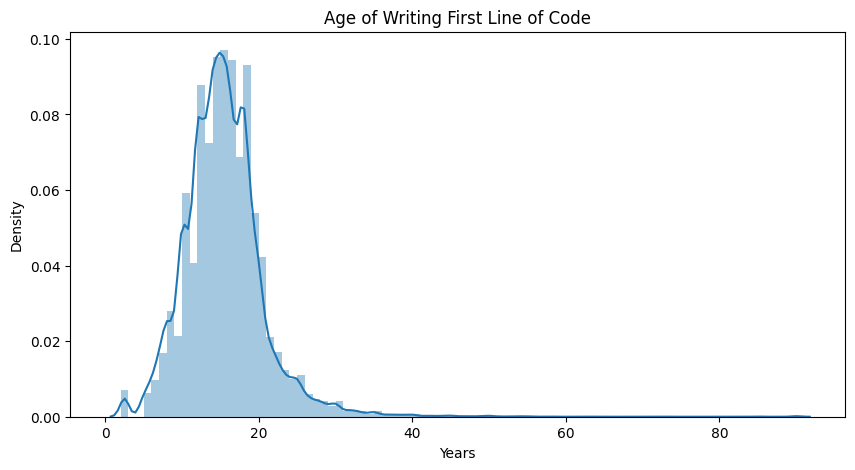

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(age1st_code, bins=np.arange(0, 91, 1))
plt.title("Age of Writing First Line of Code")
plt.xlabel("Years")
plt.show()

## **Salary**

**Distribution of Salary**

In [28]:
comp_total = survey_df["ConvertedComp"]

<ipython-input-29-0b17ce002927>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total)


Text(0.5, 0, 'Salary')

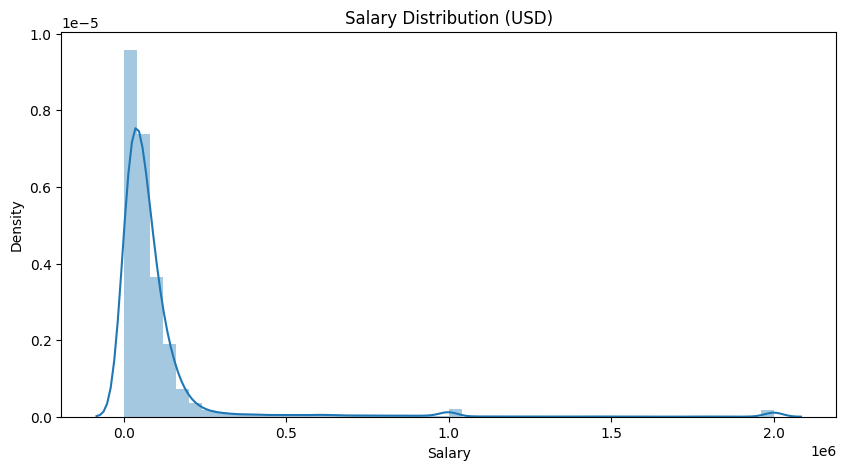

In [29]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")

**Destribution of Salary in USA (USD)**

In [30]:
comp_total_us = survey_df[survey_df["Country"] == "United States"]["ConvertedComp"]

<ipython-input-31-80beaaecbfb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total_us)


Text(0.5, 0, 'Salary')

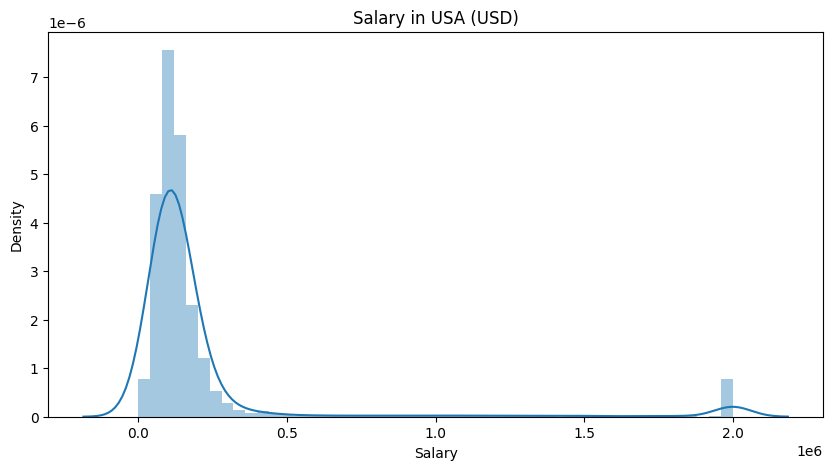

In [31]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total_us)
plt.title("Salary in USA (USD)")
plt.xlabel("Salary")

Text(0.5, 0, 'Salary')

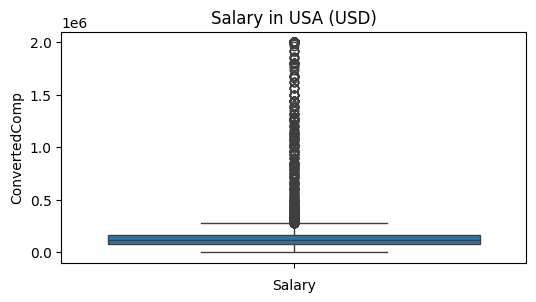

In [32]:
plt.figure(figsize=(6, 3))
sns.boxplot(comp_total_us)
plt.title("Salary in USA (USD)")
plt.xlabel("Salary")

**Distribution of Salary in Sri Lanka**

In [33]:
comp_total_sl = survey_df[survey_df["Country"] == "Sri Lanka"]["ConvertedComp"]

<ipython-input-34-ece80c1355a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_total_sl)


Text(0.5, 0, 'Salary')

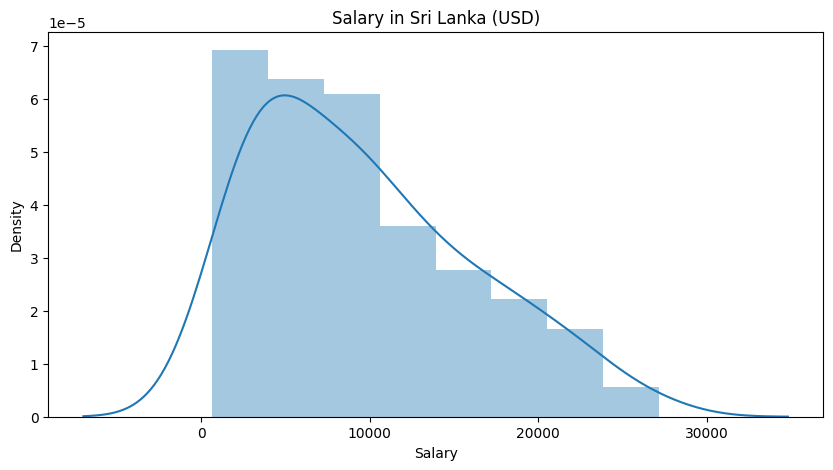

In [34]:
plt.figure(figsize=(10, 5))
sns.distplot(comp_total_sl)
plt.title("Salary in Sri Lanka (USD)")
plt.xlabel("Salary")

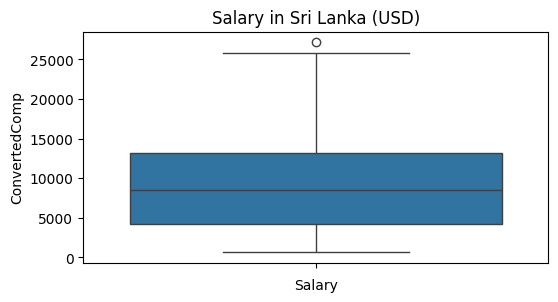

In [35]:
plt.figure(figsize=(6,3))
sns.boxplot(comp_total_sl)
plt.title("Salary in Sri Lanka (USD)")
plt.xlabel("Salary")
plt.show()

**Salary Destribution Around the Countries**

In [36]:
salary_country = survey_df.groupby("Country")["ConvertedComp"].mean().sort_values(ascending=False).head(20)

Text(0, 0.5, 'Country')

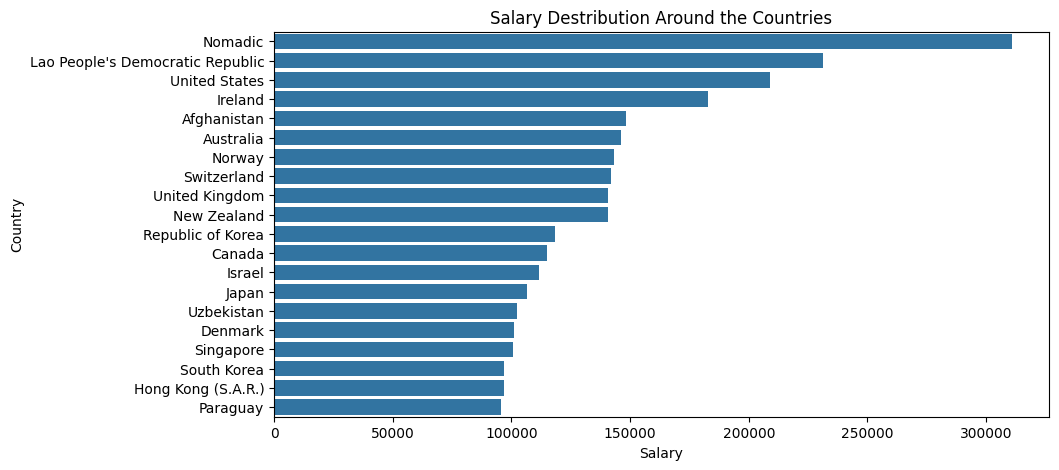

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x=salary_country.values, y=salary_country.index)
plt.title("Salary Destribution Around the Countries")
plt.xlabel("Salary")
plt.ylabel("Country")

Distribution of Currency Use

In [38]:
use_curr = survey_df["CurrencyDesc"].value_counts().sort_values(ascending=False).head(15)

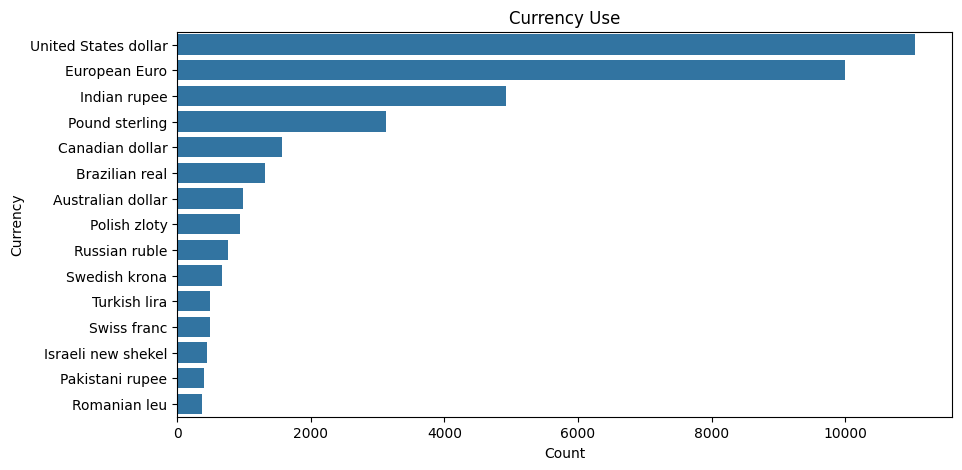

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=use_curr.values, y=use_curr.index)
plt.title("Currency Use")
plt.xlabel("Count")
plt.ylabel("Currency")
plt.show()

**Salary Distribution with Years of Professional Experience**

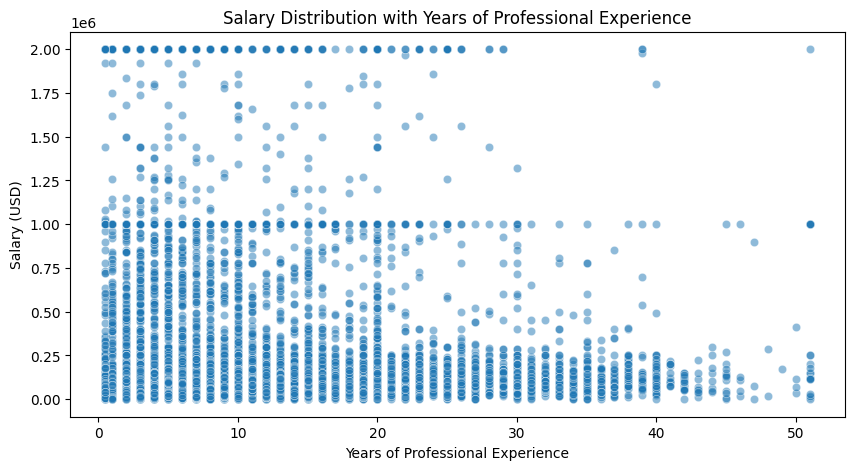

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=years_code_pro, y=comp_total, alpha=0.5)
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.ylim()
plt.title("Salary Distribution with Years of Professional Experience")
plt.show()

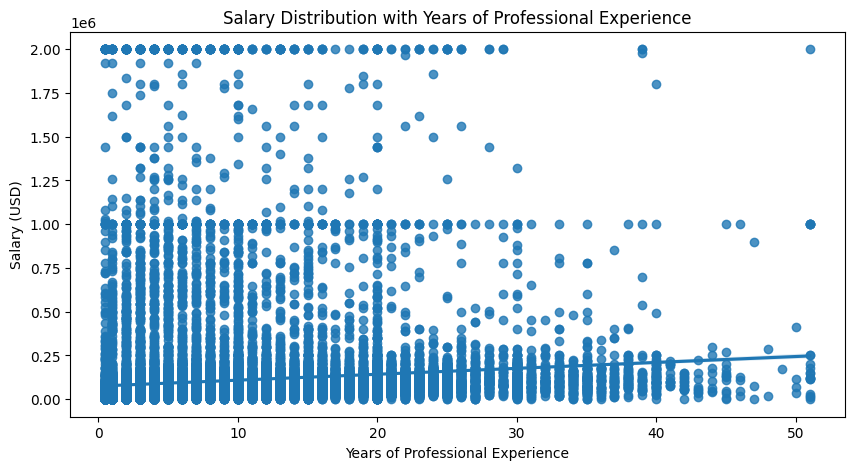

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x=years_code_pro, y=comp_total)
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.ylim()
plt.title("Salary Distribution with Years of Professional Experience")
plt.show()

**Salary Distribution with Years of Professional Experience in Sri Lanka**

In [42]:
salary_sl = survey_df[survey_df["Country"] == "Sri Lanka"][["ConvertedComp", "YearsCodePro"]]
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].replace("More than 50 years", 51)
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].replace("Less than 1 year", 0.5)
salary_sl["YearsCodePro"] = salary_sl["YearsCodePro"].astype(float)

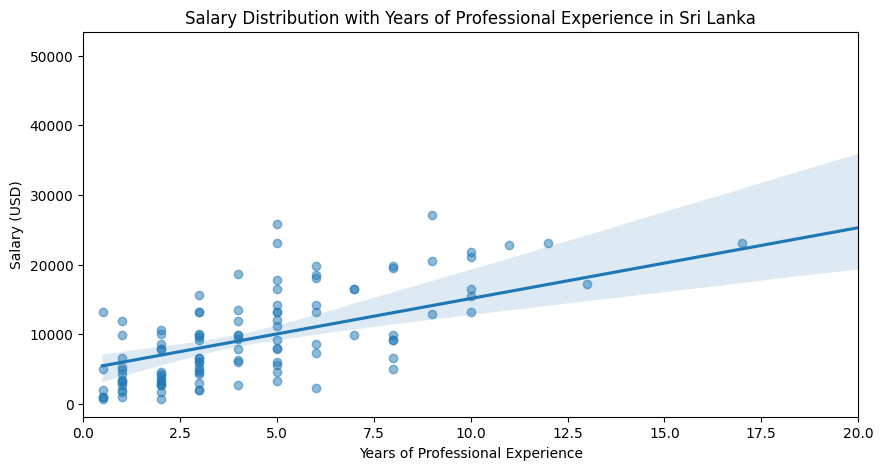

In [43]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(x=salary_sl["YearsCodePro"], y=salary_sl["ConvertedComp"], alpha=0.5)
sns.regplot(x=salary_sl["YearsCodePro"], y=salary_sl["ConvertedComp"], scatter_kws={'alpha':0.5})
plt.xlabel("Years of Professional Experience")
plt.ylabel("Salary (USD)")
plt.xlim(0,20)
plt.title("Salary Distribution with Years of Professional Experience in Sri Lanka")
plt.show()

## **Education**

In [44]:
ed_level = survey_df["EdLevel"].value_counts()
ed_level_per = ed_level *100 / ed_level.sum()

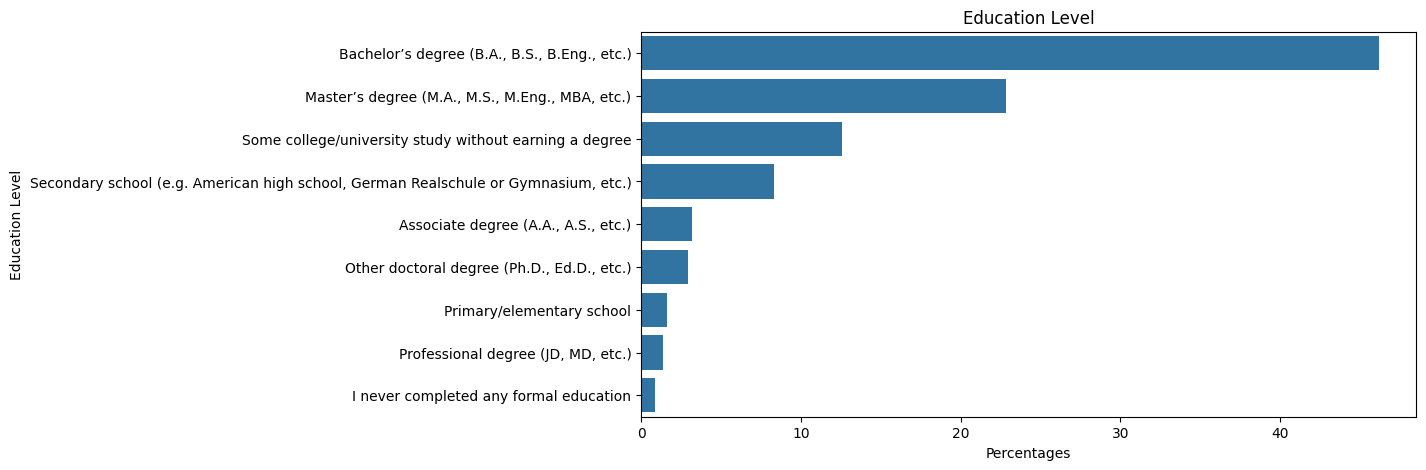

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x=ed_level_per.values, y=ed_level_per.index)
plt.title("Education Level")
plt.xlabel("Percentages")
plt.ylabel("Education Level")
plt.show()

**Education Gender Wise**

In [46]:
genders = survey_df["Gender"].unique()

In [47]:
survey_df["Gender"] = survey_df["Gender"].replace({x:"Not Confirmed" for x in genders[3:]})

In [48]:
ed_level_man = survey_df[survey_df["Gender"] == "Man"]["EdLevel"].value_counts()
ed_level_man = ed_level_man*100/ed_level_man.sum()

ed_level_woman = survey_df[survey_df["Gender"] == "Woman"]["EdLevel"].value_counts()
ed_level_woman = ed_level_woman*100/ed_level_woman.sum()
ed_level_woman = ed_level_woman.reindex(ed_level_man.index)

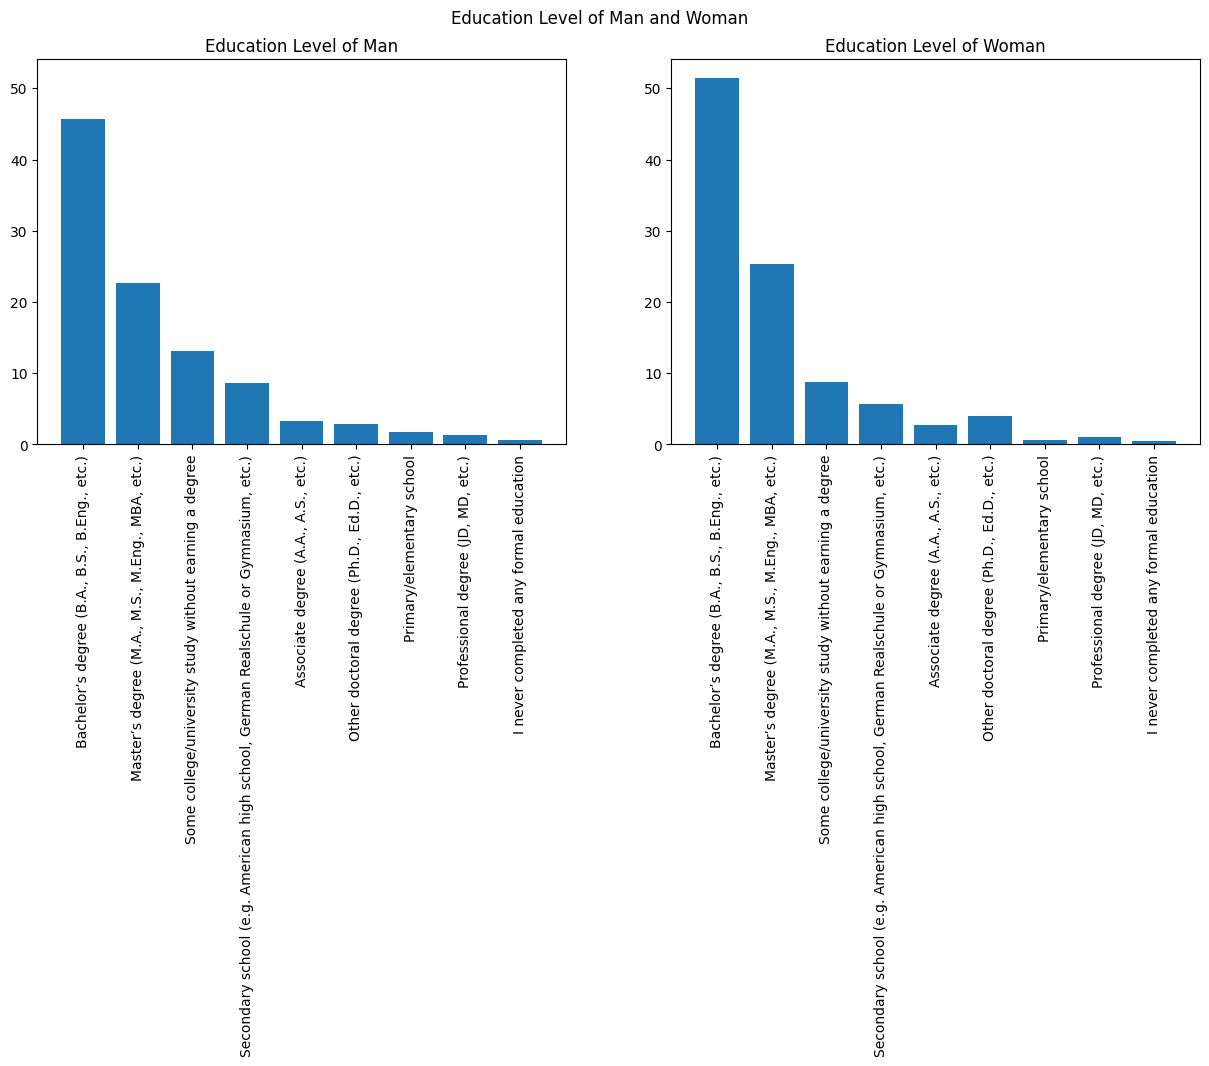

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Education Level of Man and Woman")

ax1.bar(ed_level_man.index, ed_level_man.values)
ax1.set_title("Education Level of Man")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(ed_level_woman.index, ed_level_woman.values)
ax2.set_title("Education Level of Woman")
ax2.xaxis.set_tick_params(rotation=90)

ax1.set_ylim(ax2.get_ylim())

plt.show()

**Undergraduate Major**

In [50]:
undergrad_major = survey_df["UndergradMajor"].value_counts()
undergrad_major = undergrad_major *100 / undergrad_major.sum()

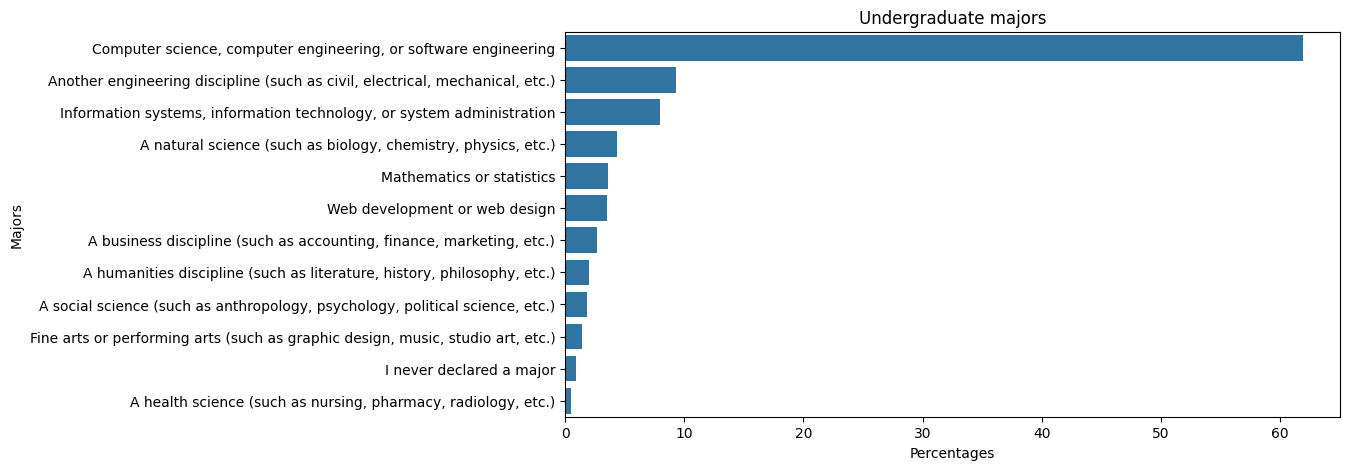

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=undergrad_major.values, y=undergrad_major.index)
plt.title("Undergraduate majors")
plt.xlabel("Percentages")
plt.ylabel("Majors")
plt.show()

**Undergraduate Major Woman vs Man**

In [52]:
undergrad_man = survey_df[survey_df["Gender"] == "Man"]["UndergradMajor"].value_counts()
undergrad_man = undergrad_man*100/undergrad_man.sum()

undergrad_woman = survey_df[survey_df["Gender"] == "Woman"]["UndergradMajor"].value_counts()
undergrad_woman = undergrad_woman*100/undergrad_woman.sum()
undergrad_woman = undergrad_woman.reindex(undergrad_man.index)

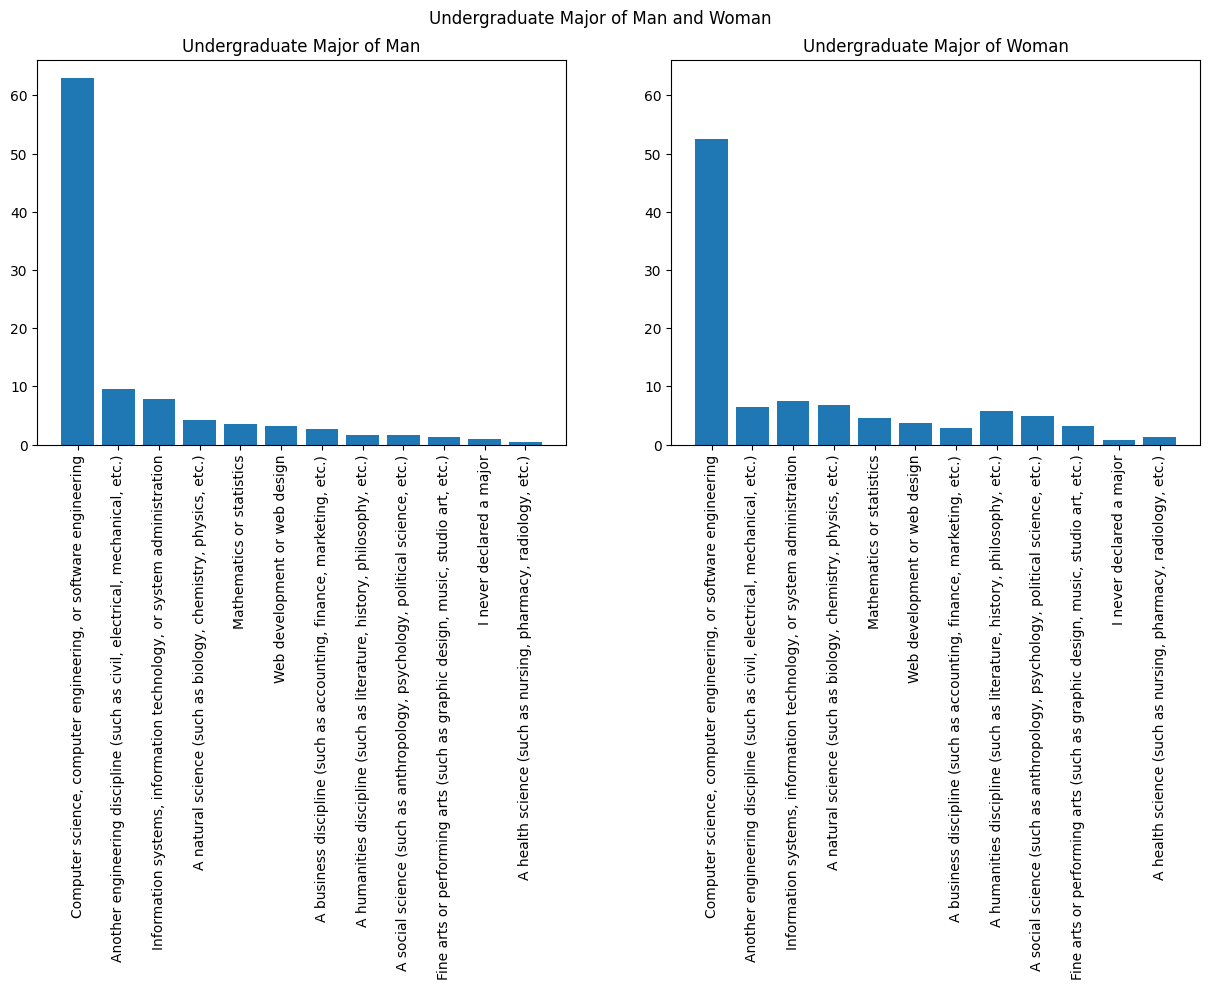

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Undergraduate Major of Man and Woman")

ax1.bar(undergrad_man.index, undergrad_man.values)
ax1.set_title("Undergraduate Major of Man")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(undergrad_woman.index, undergrad_woman.values)
ax2.set_title("Undergraduate Major of Woman")
ax2.xaxis.set_tick_params(rotation=90)

ax2.set_ylim(ax1.get_ylim())

plt.show()

**Formal Education Importance**

In [54]:
new_ed_impt = survey_df["NEWEdImpt"].value_counts()
new_ed_impt = new_ed_impt*100/new_ed_impt.sum()

Text(0, 0.5, 'Importance')

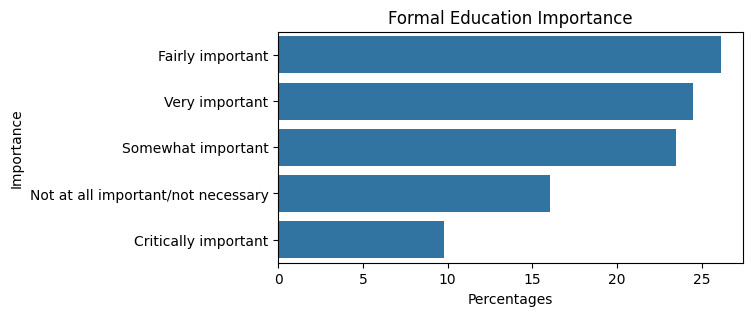

In [55]:
plt.figure(figsize=(6,3))
sns.barplot(x=new_ed_impt.values, y=new_ed_impt.index)
plt.title("Formal Education Importance")
plt.xlabel("Percentages")
plt.ylabel("Importance")

**Formal Education holders vs Non formal Education holders,   Formal Education Importance**

In [56]:
new_ed_impt_formal = survey_df[~survey_df["EdLevel"].isin(["I never completed any formal education", "Primary/elementary school"]) & survey_df["EdLevel"].notnull()]["NEWEdImpt"].value_counts()
new_ed_impt_formal = new_ed_impt_formal*100/new_ed_impt_formal.sum()

new_ed_impt_non_formal = survey_df[survey_df["EdLevel"].isin(["I never completed any formal education", "Primary/elementary school"])]["NEWEdImpt"].value_counts()
new_ed_impt_non_formal = new_ed_impt_non_formal*100/new_ed_impt_non_formal.sum()

new_ed_impt_non_formal = new_ed_impt_non_formal.reindex(new_ed_impt_formal.index)

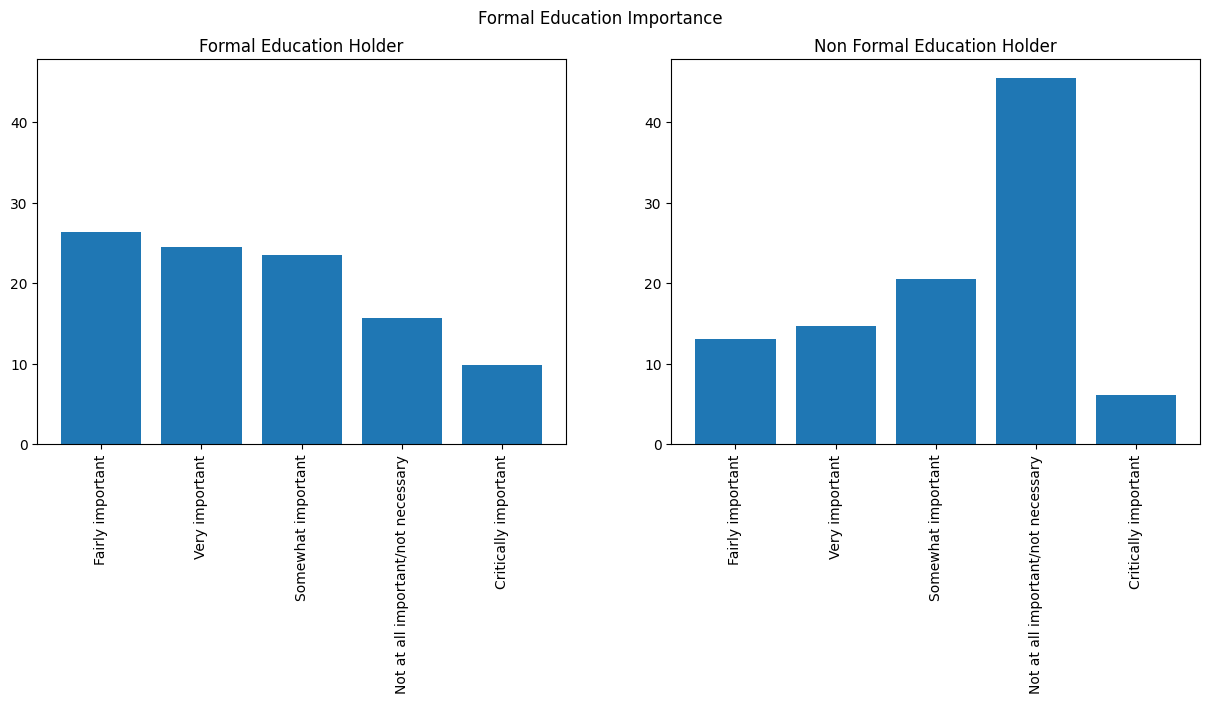

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Formal Education Importance")

ax1.bar(new_ed_impt_formal.index, new_ed_impt_formal.values)
ax1.set_title("Formal Education Holder")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(new_ed_impt_non_formal.index, new_ed_impt_non_formal.values)
ax2.set_title("Non Formal Education Holder")
ax2.xaxis.set_tick_params(rotation=90)

ax1.set_ylim(ax2.get_ylim())

plt.show()

## **Demographics**

**Ethnicity amoung stackflow users**

In [58]:
ethnicity_df = split_multi_responses(survey_df["Ethnicity"])

In [59]:
ethnicity_per = ethnicity_df.sum().sort_values(ascending=False)*100/ethnicity_df.sum().sum()

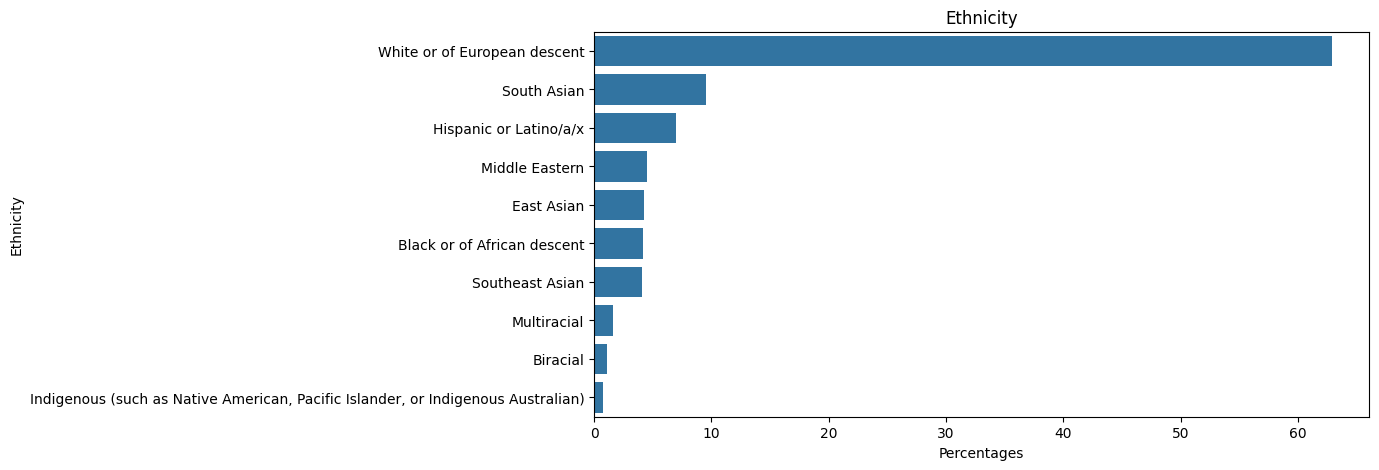

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=ethnicity_per.values, y=ethnicity_per.index)
plt.title("Ethnicity")
plt.xlabel("Percentages")
plt.ylabel("Ethnicity")
plt.show()

**Gender Percentage**

In [61]:
gender = survey_df["Gender"].value_counts()
gender_per = gender*100/gender.sum()

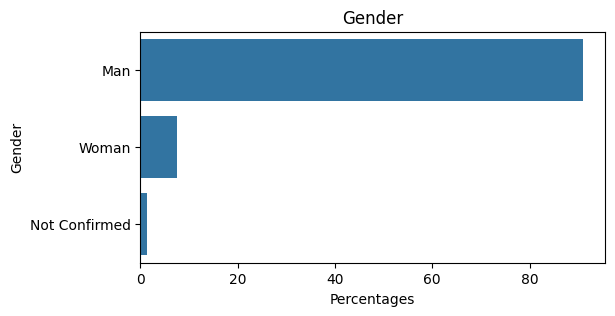

In [62]:
plt.figure(figsize=(6,3))
sns.barplot(x=gender_per.values, y=gender_per.index)
plt.title("Gender")
plt.xlabel("Percentages")
plt.ylabel("Gender")
plt.show()

**Females in Different Ethnicity**

In [63]:
ethnicity_df["Gender"] = survey_df["Gender"]

In [64]:
ethnicities = ethnicity_df.columns[:-1]
ethnicity_woman = pd.DataFrame(columns=("Ethnicity", "Count"))
i = 0

for ethnicity in ethnicities:
  count = ethnicity_df[ethnicity_df["Gender"] == "Woman"][ethnicity].sum()
  ethnicity_woman.loc[i] = [ethnicity, count]
  i = i+1

In [65]:
ethnicity_total = ethnicity_df[[x for x in ethnicities]].sum()
ethnicity_total = ethnicity_total.reindex(ethnicity_woman["Ethnicity"])
ethnicity_total_per = ethnicity_total*100/ethnicity_total.sum()

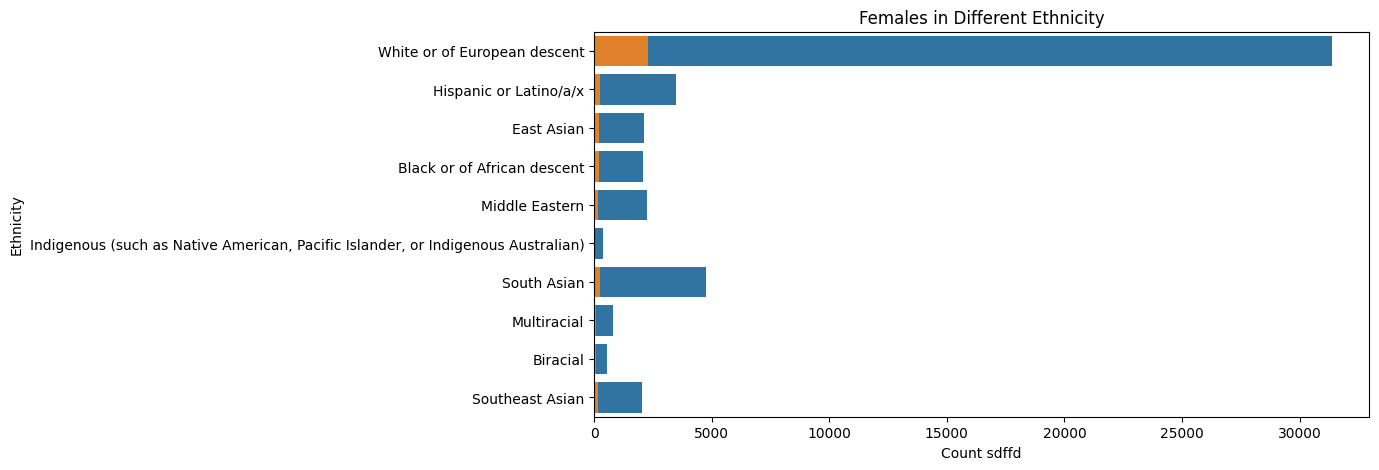

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x=ethnicity_total, y=ethnicity_total.index)
sns.barplot(x=ethnicity_woman["Count"], y=ethnicity_woman["Ethnicity"])
plt.title("Females in Different Ethnicity")
plt.xlabel("Count sdffd")
plt.ylabel("Ethnicity")
plt.show()

**Transgender**

In [67]:
country_gender_not =  survey_df[survey_df["Gender"] == "Not Confirmed"].groupby("Country")["Gender"].count().sort_values(ascending=False)
country_gender_not_per = (country_gender_not*100/country_gender_not.sum()).head(20)

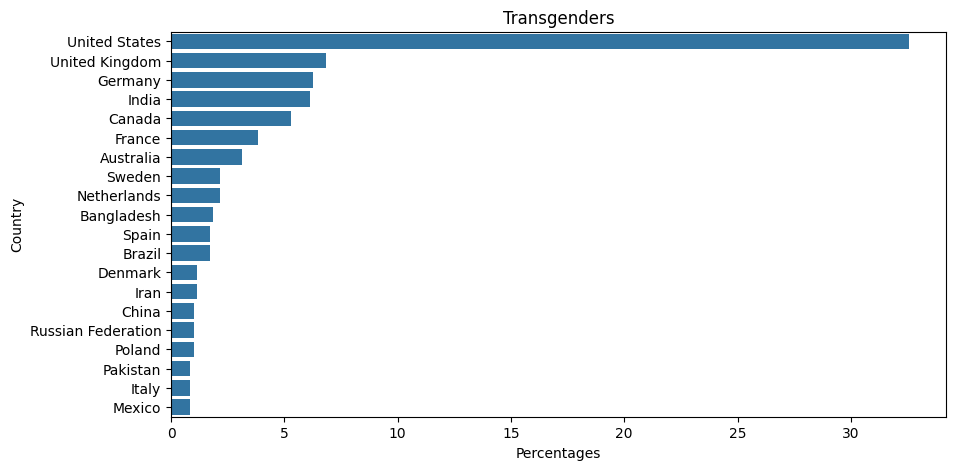

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x=country_gender_not_per.values, y=country_gender_not_per.index)
plt.title("Transgenders")
plt.xlabel("Percentages")
plt.ylabel("Country")
plt.show()

**Sexual Orientation**

In [69]:
sexual_orientation_df = split_multi_responses(survey_df["Sexuality"])

In [70]:
sexual_orientation = sexual_orientation_df.sum().sort_values(ascending=False)
sexual_orientation_per = sexual_orientation*100/sexual_orientation.sum()
sexual_orientation_per

Straight / Heterosexual    90.323588
Bisexual                    5.548494
Gay or Lesbian              2.658281
Queer                       1.469637
dtype: float64

Text(0, 0.5, 'Sexual Orientation')

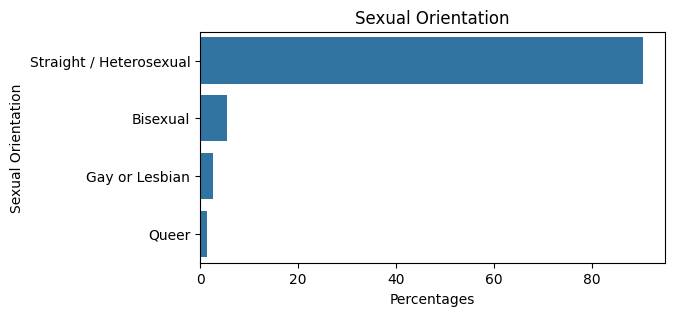

In [71]:
plt.figure(figsize=(6,3))
sns.barplot(x=sexual_orientation_per, y=sexual_orientation_per.index)
plt.title("Sexual Orientation")
plt.xlabel("Percentages")
plt.ylabel("Sexual Orientation")

**Age by Country**

In [72]:
# Calculate the countries with more than 250 responses
countries_over_250 = survey_df.groupby("Country")["Age"].count() > 250

# Filter the DataFrame using the .loc[] accessor and the boolean Series
filtered_survey_df = survey_df.loc[survey_df['Country'].isin(countries_over_250[countries_over_250].index)]

country_age = filtered_survey_df.groupby("Country")["Age"].mean().sort_values(ascending=False).head(30)

Text(0, 0.5, 'Country')

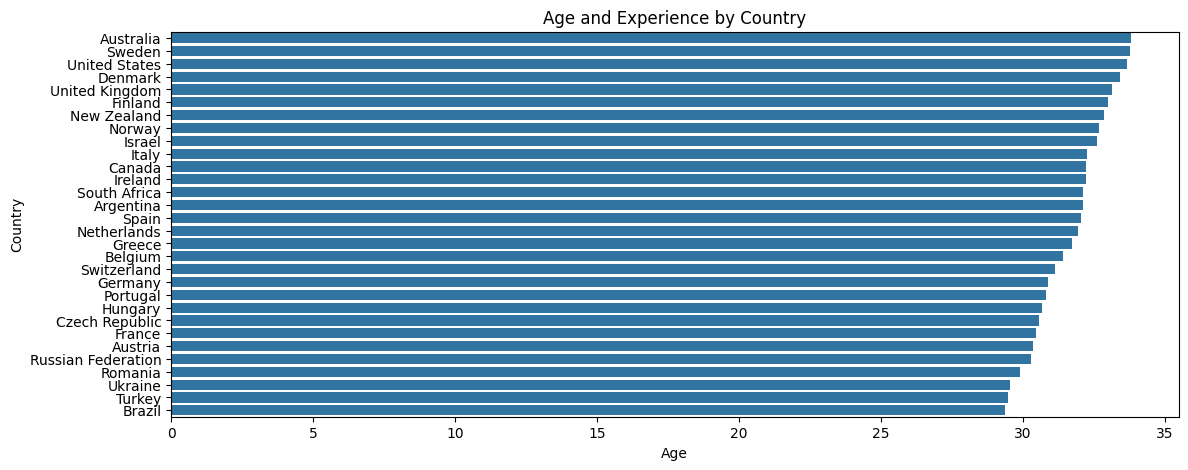

In [73]:
plt.figure(figsize=(13,5))
sns.barplot(x=country_age.values, y=country_age.index)
plt.title("Age and Experience by Country")
plt.xlabel("Age")
plt.ylabel("Country")

**Experience by Country**

In [74]:
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].replace("More than 50 years", 55)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].replace("Less than 1 year", 0.5)

In [75]:
survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"], errors='coerce')

# Calculate the countries with more than 250 responses
countries_over_250_yearscodepro = survey_df.groupby("Country")["YearsCodePro"].count() > 250

# Filter the DataFrame using the .loc[] accessor and the boolean Series
filtered_survey_yearscodepro_df = survey_df.loc[survey_df['Country'].isin(countries_over_250_yearscodepro[countries_over_250_yearscodepro].index)]

country_yearscodepro = filtered_survey_yearscodepro_df.groupby("Country")["YearsCodePro"].mean().sort_values(ascending=False).head(30)

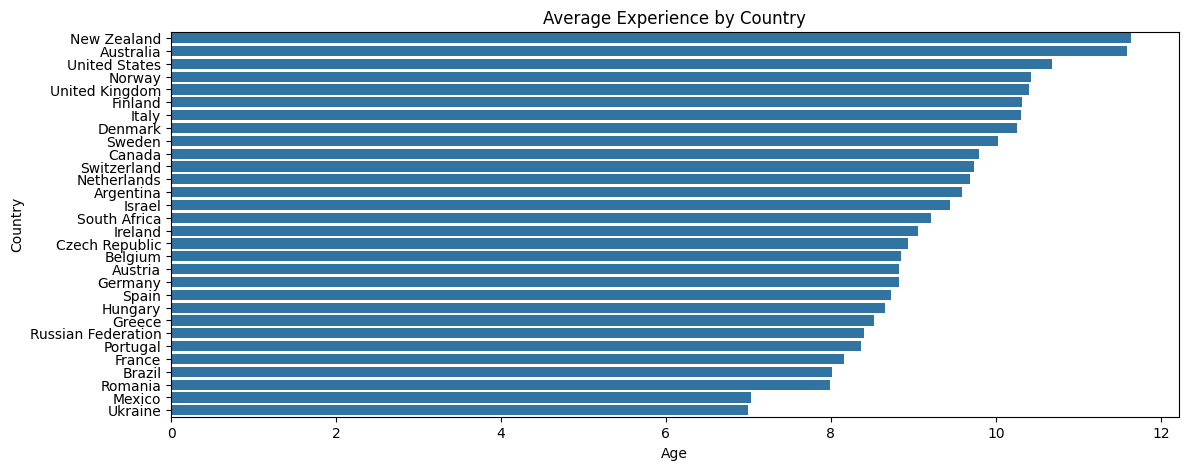

In [76]:
plt.figure(figsize=(13,5))
sns.barplot(x=country_yearscodepro.values, y=country_yearscodepro.index)
plt.title("Average Experience by Country")
plt.xlabel("Age")
plt.ylabel("Country")
plt.show()

## **Most Popular Technologies**

**Programming, Scripting, and Markup Languages**

In [77]:
programming_lan = split_multi_responses(survey_df["LanguageWorkedWith"])
programming_lan_count = programming_lan.sum().sort_values(ascending=False)
programming_lan_per = programming_lan_count*100/programming_lan_count.sum()

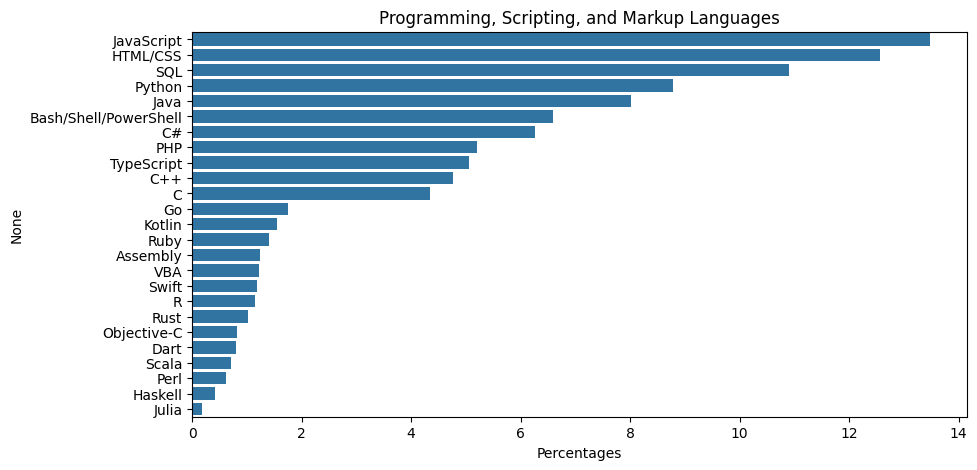

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x=programming_lan_per.values, y=programming_lan_per.index)
plt.title("Programming, Scripting, and Markup Languages")
plt.xlabel("Percentages")
plt.show()

**Programming, Scripting, and Markup Languages(Desired Next Year)**

In [79]:
programming_lan_next = split_multi_responses(survey_df["LanguageDesireNextYear"])
programming_lan_next_count = programming_lan_next.sum().sort_values(ascending=False)
programming_lan_next_per = programming_lan_next_count*100/programming_lan_next_count.sum()

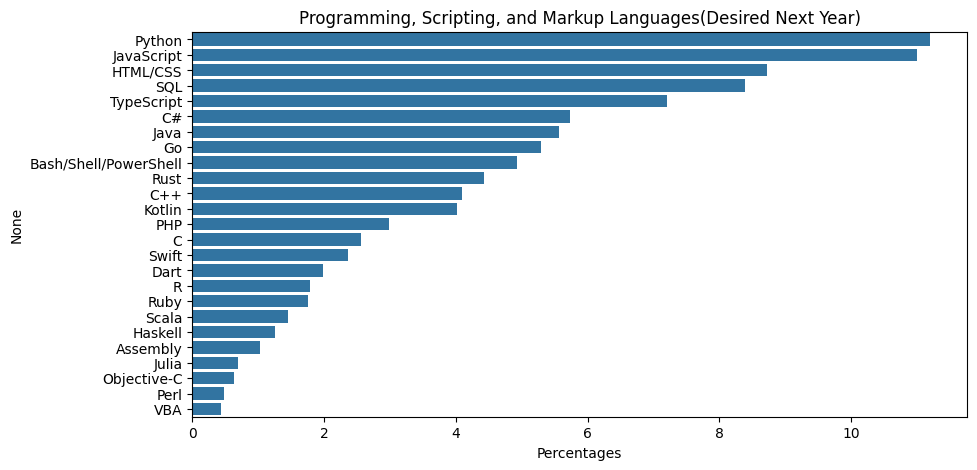

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x=programming_lan_next_per.values, y=programming_lan_next_per.index)
plt.title("Programming, Scripting, and Markup Languages(Desired Next Year)")
plt.xlabel("Percentages")
plt.show()

**Web Frameworks**

In [81]:
webframeworks = split_multi_responses(survey_df["WebframeWorkedWith"])
webframeworks_count = webframeworks.sum().sort_values(ascending=False)
webframeworks_per = webframeworks_count*100/webframeworks_count.sum()

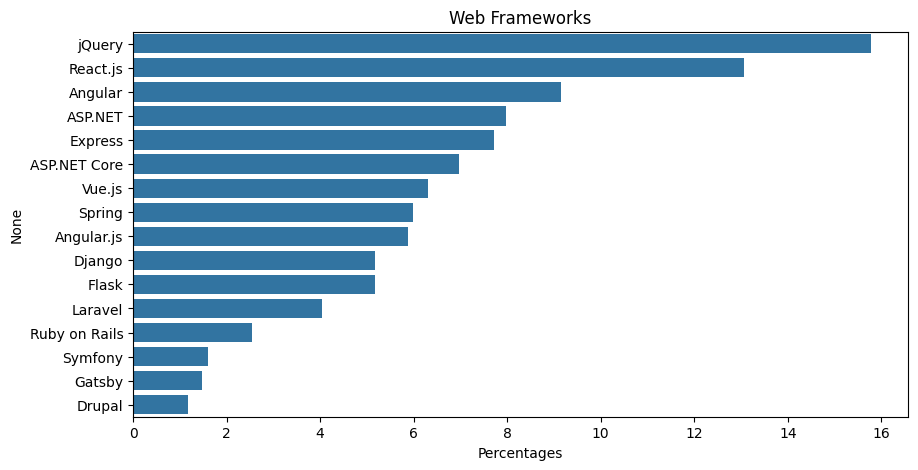

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x=webframeworks_per.values, y=webframeworks_per.index)
plt.title("Web Frameworks")
plt.xlabel("Percentages")
plt.show()

**Web Frameworks(Desired Next Year)**

In [83]:
webframeworks_next = split_multi_responses(survey_df["WebframeDesireNextYear"])
webframeworks_next_count = webframeworks_next.sum().sort_values(ascending=False)
webframeworks_next_per = webframeworks_next_count*100/webframeworks_next_count.sum()

Text(0.5, 0, 'Percentages')

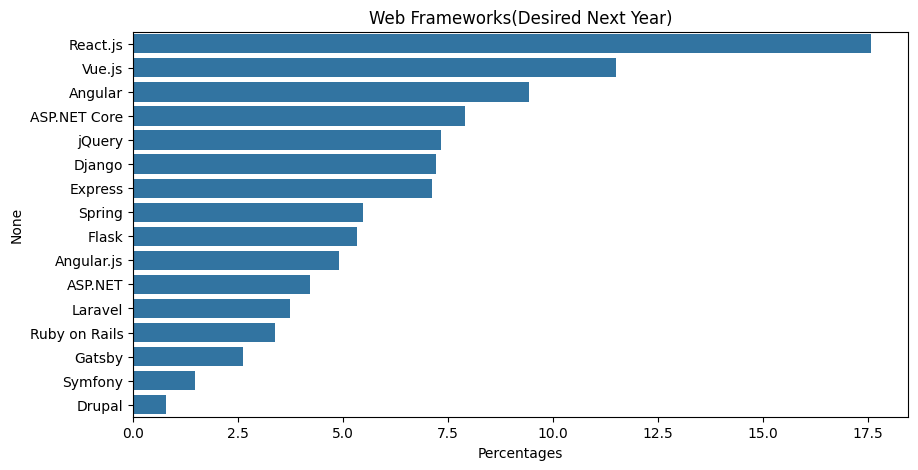

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x=webframeworks_next_per.values, y=webframeworks_next_per.index)
plt.title("Web Frameworks(Desired Next Year)")
plt.xlabel("Percentages")

**Database Worked With**

In [85]:
database = split_multi_responses(survey_df["DatabaseWorkedWith"])
database_count = database.sum().sort_values(ascending=False)
database_per = database_count*100/database_count.sum()

Text(0.5, 0, 'Percentages')

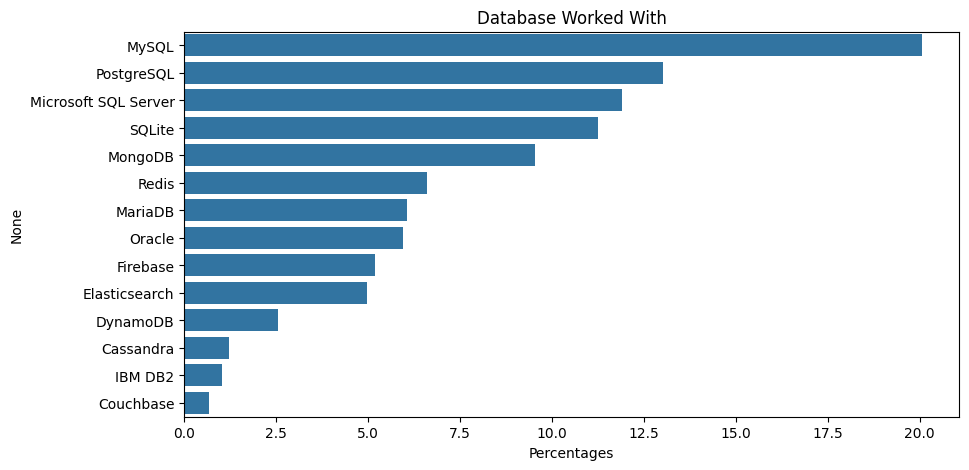

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(x=database_per.values, y=database_per.index)
plt.title("Database Worked With")
plt.xlabel("Percentages")

**Database Desire Next Year**

In [87]:
database_next = split_multi_responses(survey_df["DatabaseDesireNextYear"])
database_next_count = database_next.sum().sort_values(ascending=False)
database_next_per = database_next_count*100/database_next_count.sum()

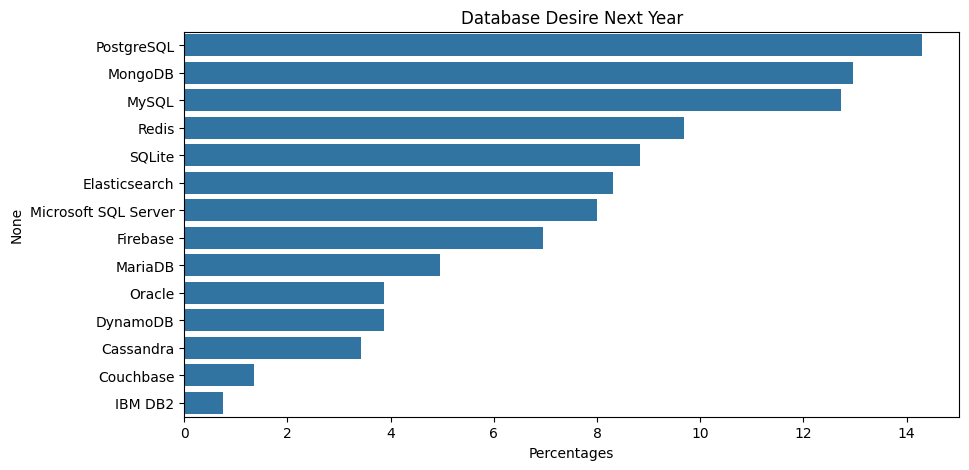

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=database_next_per.values, y=database_next_per.index)
plt.title("Database Desire Next Year")
plt.xlabel("Percentages")
plt.show()

**Platform Worked With vs Platform Desire NextYear**

In [89]:
platform = split_multi_responses(survey_df["PlatformWorkedWith"])
platform_count = platform.sum().sort_values(ascending=False)
platform_per = platform_count*100/platform_count.sum()

In [90]:
platform_next = split_multi_responses(survey_df["PlatformDesireNextYear"])
platform_next_count = platform_next.sum().sort_values(ascending=False)
platform_next_per = platform_next_count*100/platform_next_count.sum()

platform_next_per = platform_next_per.reindex(platform_per.index)

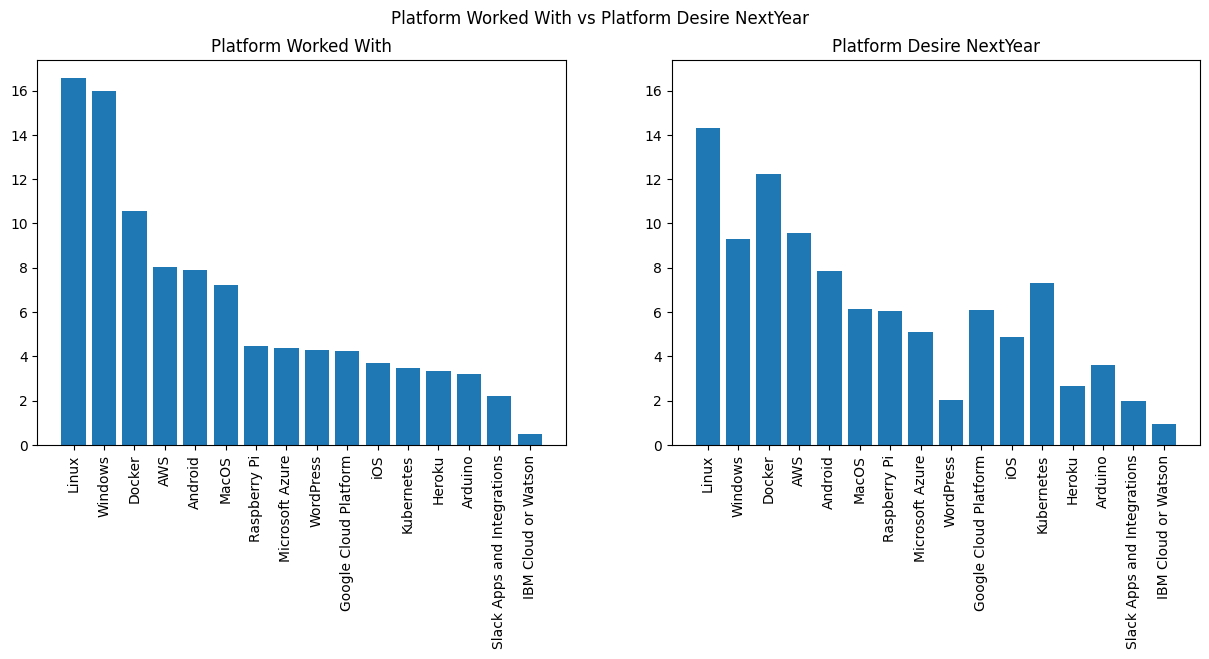

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Platform Worked With vs Platform Desire NextYear")

# Specify the heights of the bars using platform_per.values
ax1.bar(platform_per.index, platform_per.values) # Changed here
ax1.set_title("Platform Worked With")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(platform_next_per.index, platform_next_per.values)
ax2.set_title("Platform Desire NextYear")
ax2.xaxis.set_tick_params(rotation=90)

ax2.set_ylim(ax1.get_ylim())

plt.show()

**Primary Operating System**

In [92]:
primary_os = survey_df["OpSys"].value_counts()
primary_os = primary_os*100/primary_os.sum()

Text(0.5, 0, 'Percentages')

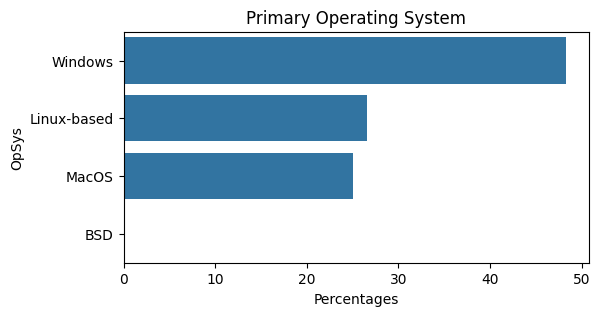

In [93]:
plt.figure(figsize=(6,3))
sns.barplot(x=primary_os.values, y=primary_os.index)
plt.title("Primary Operating System")
plt.xlabel("Percentages")

**Collabaration Tools**

In [94]:
collab_tool = split_multi_responses(survey_df["NEWCollabToolsWorkedWith"])
collab_tool_count = collab_tool.sum().sort_values(ascending=False)
collab_tool_per = collab_tool_count*100/collab_tool_count.sum()

In [95]:
collab_tool_next = split_multi_responses(survey_df["NEWCollabToolsDesireNextYear"])
collab_tool_next_count = collab_tool_next.sum().sort_values(ascending=False)
collab_tool_next_per = collab_tool_next_count*100/collab_tool_next_count.sum()

collab_tool_next_per = collab_tool_next_per.reindex(collab_tool_per.index)

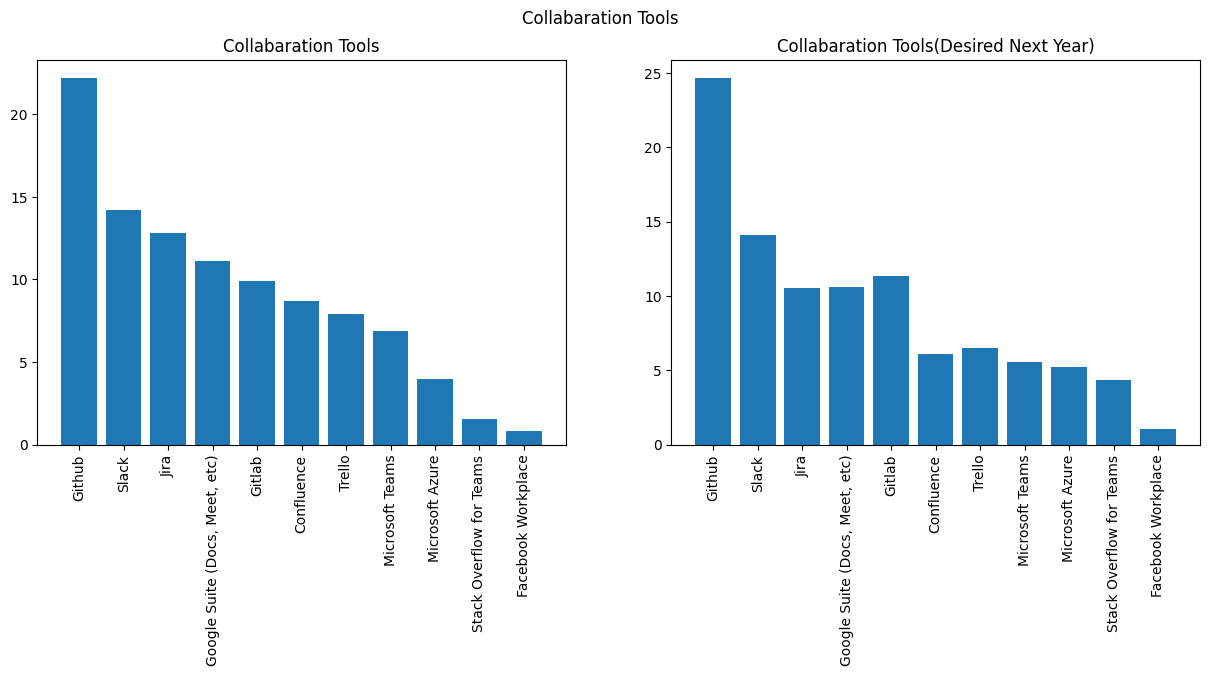

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Collabaration Tools")

ax1.bar(collab_tool_per.index, collab_tool_per.values)
ax1.set_title("Collabaration Tools")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(collab_tool_next_per.index, collab_tool_next_per.values)
ax2.set_title("Collabaration Tools(Desired Next Year)")
ax2.xaxis.set_tick_params(rotation=90)

plt.show()

**New Purchase Researching Tools**

In [97]:
researching_tool_df = split_multi_responses(survey_df["NEWPurchaseResearch"])
researching_tool = researching_tool_df.sum().sort_values(ascending=False)
researching_tool_per = researching_tool*100/researching_tool.sum()

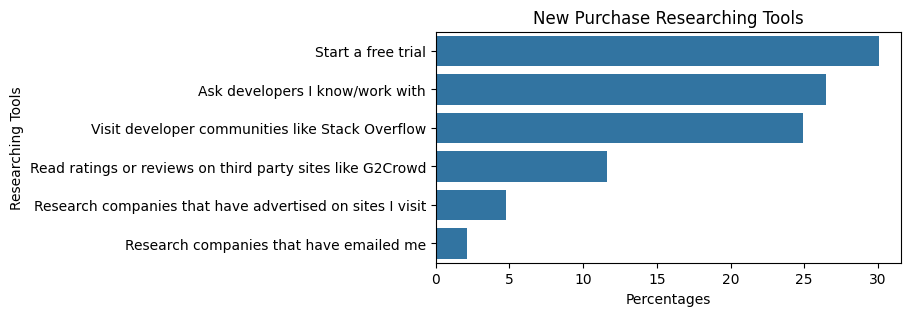

In [98]:
plt.figure(figsize=(6,3))
sns.barplot(x=researching_tool_per.values, y=researching_tool_per.index)
plt.title("New Purchase Researching Tools")
plt.xlabel("Percentages")
plt.ylabel("Researching Tools")
plt.show()

**OverTime**

In [99]:
overtime = survey_df["NEWOvertime"].value_counts()
overtime_per = overtime*100/overtime.sum()

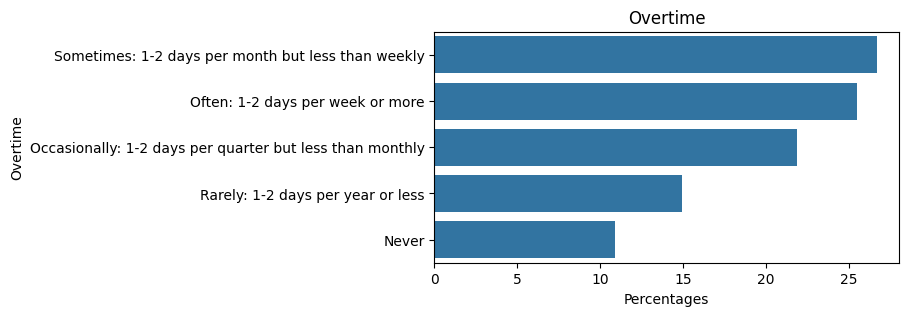

In [100]:
plt.figure(figsize=(6,3))
sns.barplot(x=overtime_per.values, y=overtime_per.index)
plt.title("Overtime")
plt.xlabel("Percentages")
plt.ylabel("Overtime")
plt.show()

**OverTime by Organization**

In [101]:
overtime_indx = survey_df["NEWOvertime"].value_counts().index

In [102]:
orgs = survey_df["OrgSize"].value_counts().index

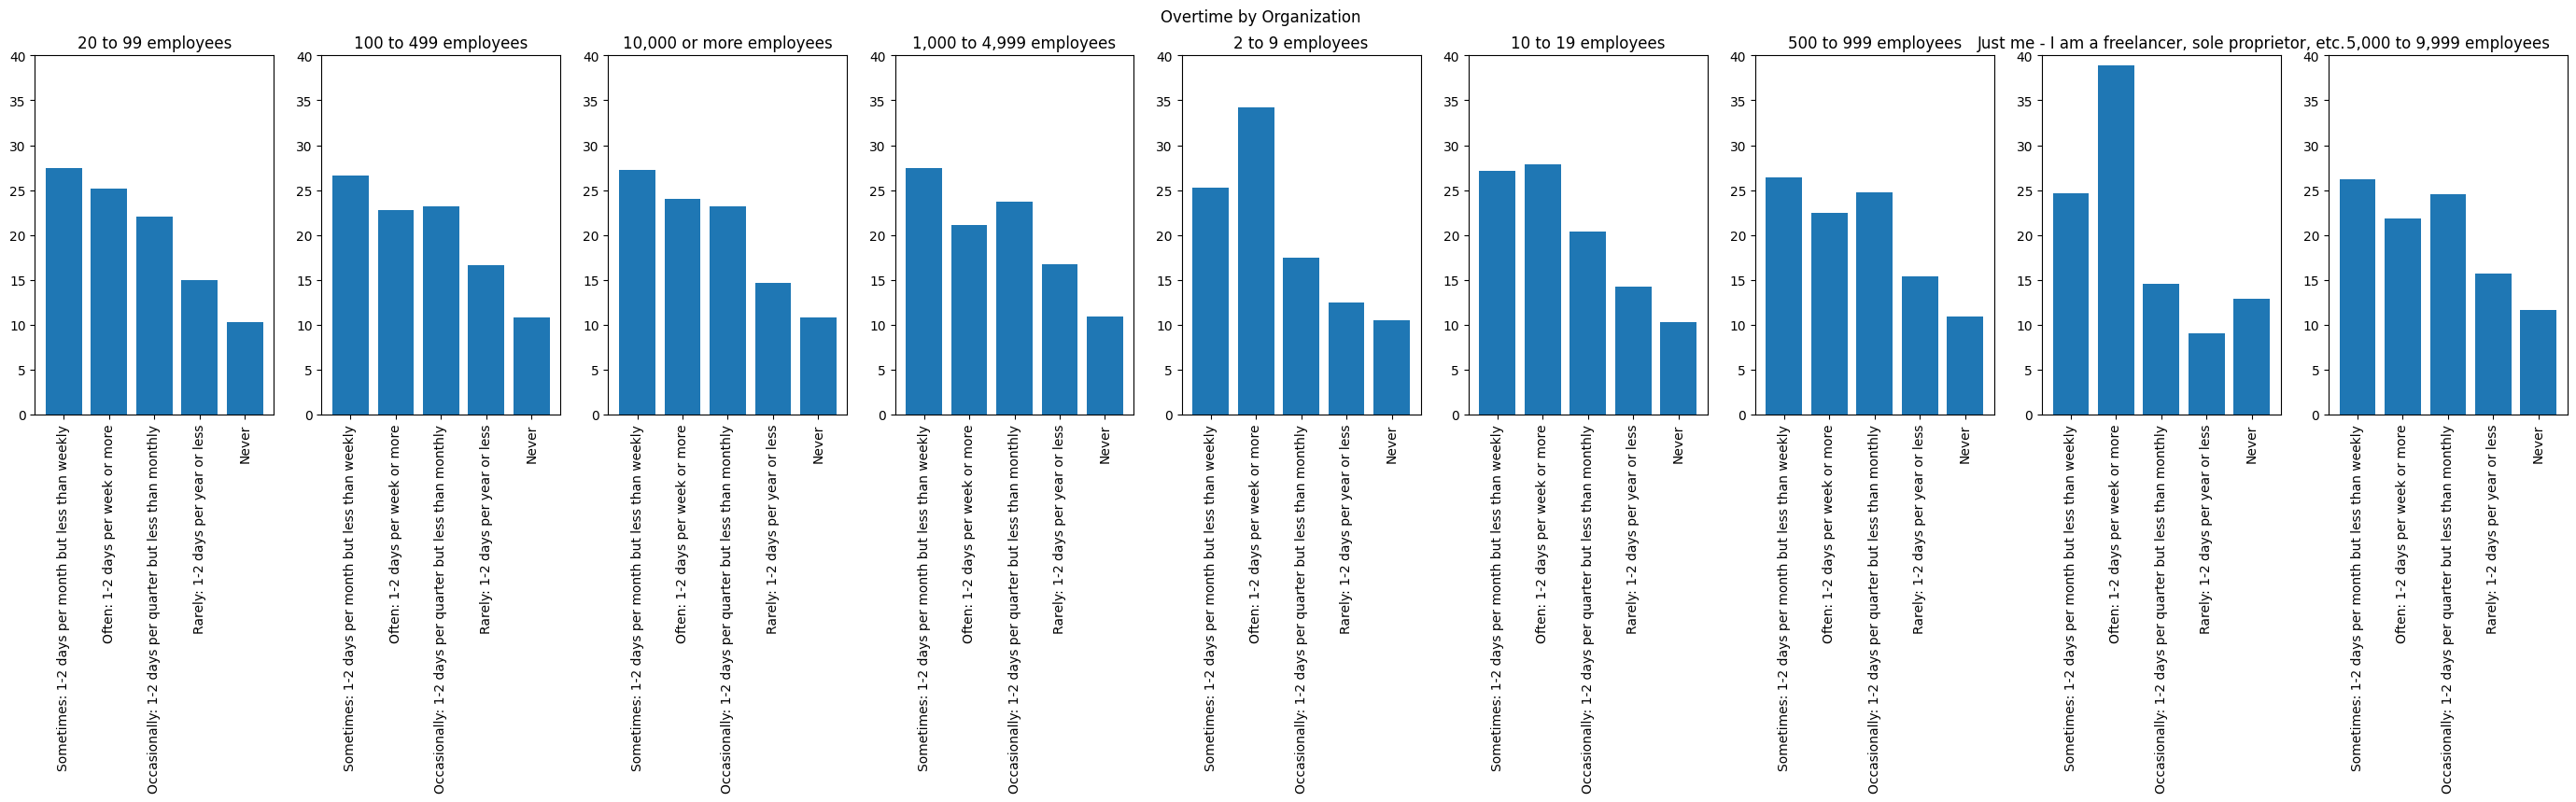

In [103]:
fig, ax = plt.subplots(1, len(orgs), figsize=(35, 5))
fig.suptitle("Overtime by Organization")

i=0
for org in orgs:
  overtime = survey_df[survey_df["OrgSize"] == org]["NEWOvertime"].value_counts()
  overtime = overtime.reindex(overtime_indx)
  overtime_per = overtime*100/overtime.sum()
  ax[i].bar(overtime_per.index, overtime_per.values, label=org)
  ax[i].set_title(org)
  ax[i].xaxis.set_tick_params(rotation=90)
  ax[i].set_ylim(0, 40)
  i = i+1

plt.show()

**What Languages Are Associated with the Highest Salaries USA?**

In [104]:
salary_programming = programming_lan
salary_programming["Salary"] = survey_df["ConvertedComp"]
salary_programming["Country"] = survey_df["Country"]

In [105]:
salary_programming_usa = salary_programming[salary_programming["Country"] == "United States"]
programming_languages = programming_lan.columns[:-2]

In [106]:
programming_lan_salary = pd.DataFrame(columns=("Language", "Salary"))

i=0
for programming_language in programming_languages:
  salary = salary_programming_usa[salary_programming_usa[programming_language]==True]["Salary"].mean()
  programming_lan_salary.loc[i] = [programming_language, salary]
  i = i+1

In [107]:
programming_lan_salary = programming_lan_salary.sort_values(by="Salary", ascending=False)

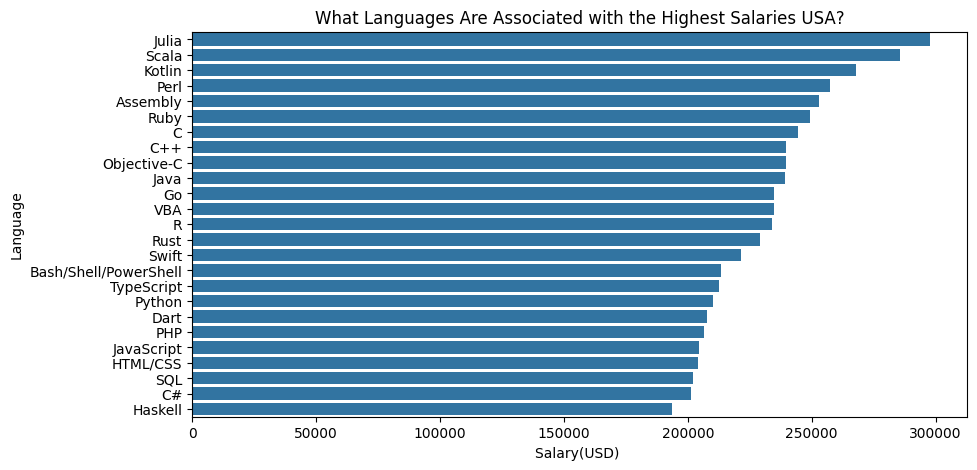

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x=programming_lan_salary["Salary"], y=programming_lan_salary["Language"])
plt.title("What Languages Are Associated with the Highest Salaries USA?")
plt.xlabel("Salary(USD) ")
plt.ylabel("Language")
plt.show()

## **Learning & Problem Solving**

**Learning new tech frequency**

In [109]:
new_learn_fre = survey_df["NEWLearn"].value_counts()
new_learn_fre_pre = new_learn_fre*100/new_learn_fre.sum()

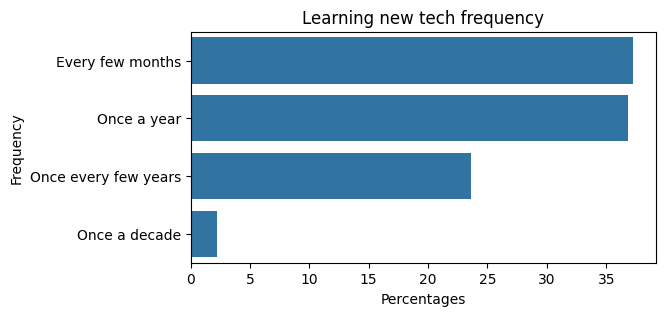

In [110]:
plt.figure(figsize=(6,3))
sns.barplot(x=new_learn_fre_pre.values, y=new_learn_fre_pre.index)
plt.title("Learning new tech frequency")
plt.xlabel("Percentages")
plt.ylabel("Frequency")
plt.show()

In [111]:
new_learn_fre_man = survey_df[survey_df["Gender"] == "Man"]["NEWLearn"].value_counts()
new_learn_fre_man_pre = new_learn_fre_man*100/new_learn_fre_man.sum()

new_learn_fre_woman = survey_df[survey_df["Gender"] == "Woman"]["NEWLearn"].value_counts()
new_learn_fre_woman_pre = new_learn_fre_woman*100/new_learn_fre_woman.sum()

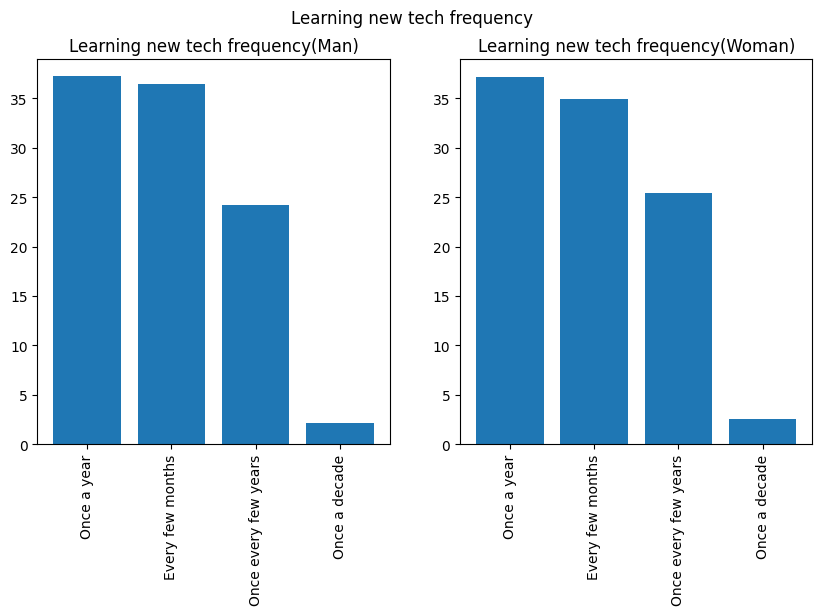

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Learning new tech frequency")

ax1.bar(new_learn_fre_man_pre.index, new_learn_fre_man_pre.values)
ax1.set_title("Learning new tech frequency(Man)")
ax1.xaxis.set_tick_params(rotation=90)

ax2.bar(new_learn_fre_woman_pre.index, new_learn_fre_woman_pre.values)
ax2.set_title("Learning new tech frequency(Woman)")
ax2.xaxis.set_tick_params(rotation=90)

ax1.set_ylim(ax2.get_ylim())

plt.show()

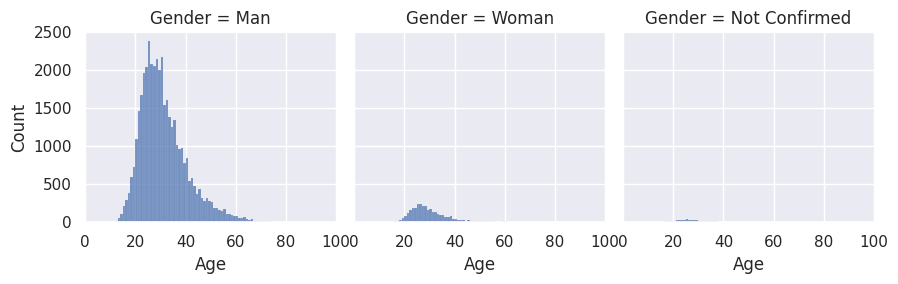

In [113]:
sns.set_theme(style="darkgrid")
sns.displot(
    survey_df, x="Age", col="Gender",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True)
)
plt.ylim(0, 2500)
plt.xlim(0,100)
plt.show()

**What do you do when you get stuck on a problem?**

In [114]:
stuck_df = split_multi_responses(survey_df["NEWStuck"])

In [115]:
stuck_df_count = stuck_df.sum().sort_values(ascending=False)
stuck_df_per = stuck_df_count*100/len(stuck_df)

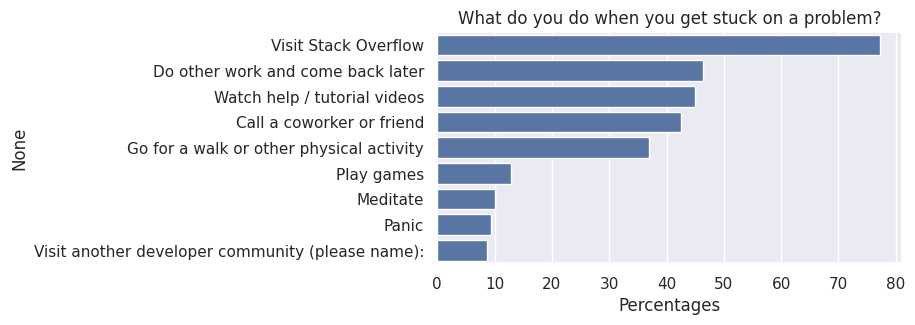

In [116]:
plt.figure(figsize=(6,3))
sns.barplot(x=stuck_df_per.values, y=stuck_df_per.index)
plt.title("What do you do when you get stuck on a problem?")
plt.xlabel("Percentages")
plt.show()

**Employment Status**

In [118]:
employment = survey_df["Employment"].value_counts()
employment_per = employment*100/employment.sum()

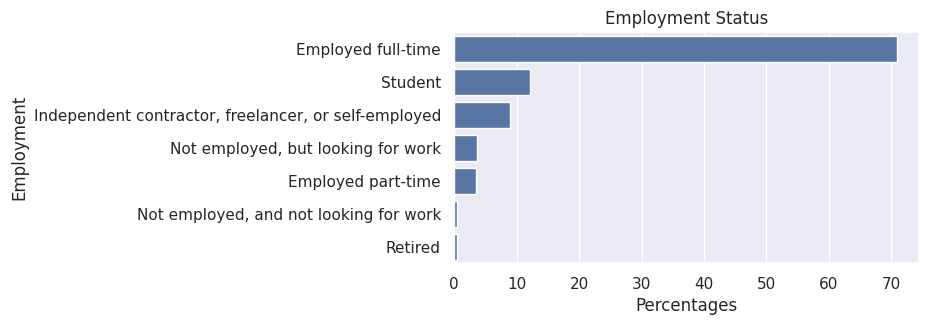

In [119]:
plt.figure(figsize=(6,3))
sns.barplot(x=employment_per.values, y=employment_per.index)
plt.title("Employment Status")
plt.xlabel("Percentages")
plt.show()

**Presence of DevOps Personnel**

In [121]:
devops_pres = survey_df["NEWDevOps"].value_counts()
devops_pres_per = devops_pres*100/devops_pres.sum()

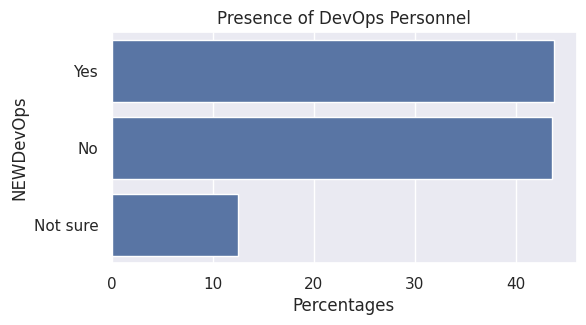

In [122]:
plt.figure(figsize=(6,3))
sns.barplot(x=devops_pres_per.values, y=devops_pres_per.index)
plt.title("Presence of DevOps Personnel")
plt.xlabel("Percentages")
plt.show()

**Importance of DevOps**

In [124]:
devops_imp = survey_df["NEWDevOpsImpt"].value_counts()
devops_imp_per = devops_imp*100/devops_imp.sum()

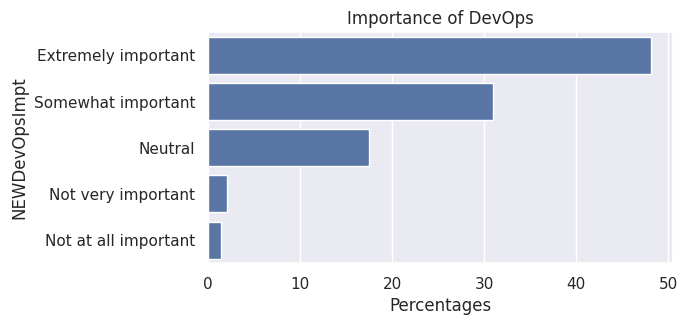

In [125]:
plt.figure(figsize=(6,3))
sns.barplot(x=devops_imp_per.values, y=devops_imp_per.index)
plt.title("Importance of DevOps")
plt.xlabel("Percentages")
plt.show()